Objective : Learning Time Series Concepts

### What is a time series ?

A time series is a set of observations Xt, each one being recorded at a specific time t.

In [1]:
import pandas as pd

In [13]:
ts_data = pd.read_csv('sample_data/ITC_NS.csv')

### About the Data Set
The sample data is collection from Yahoo Finance for ITC-NSE Stocks over the last 5 years.  

In [14]:
ts_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-17,233.667007,235.500000,231.800003,234.567001,210.079010,8807338.0
1,2015-04-20,234.733002,234.733002,227.067001,227.932999,204.137573,11275531.0
2,2015-04-21,227.899994,232.466995,227.332993,227.966995,204.168015,10890328.0
3,2015-04-22,226.667007,230.000000,225.699997,228.932999,205.033173,10768515.0
4,2015-04-23,228.932999,231.000000,225.533005,228.067001,204.257584,8924629.0


In [15]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'],format = '%Y-%m-%d')

In [16]:
ts_data['avg_price'] = (ts_data['Open'] +ts_data['Close']+ts_data['High']+ts_data['Low'])/4

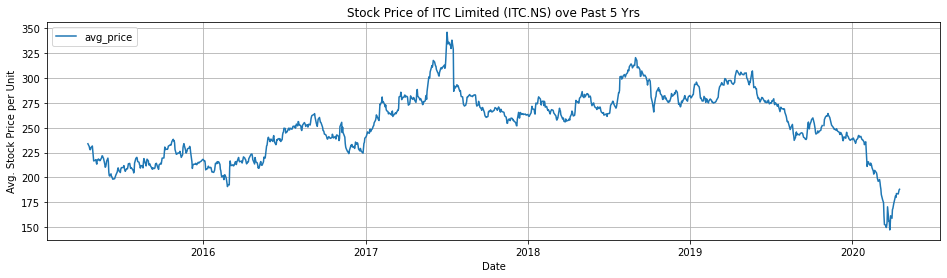

In [17]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(16, 4)

plt.plot(ts_data['Date'], ts_data['avg_price'])
plt.legend(['avg_price'], loc='upper left')
plt.title('Stock Price of ITC Limited (ITC.NS) ove Past 5 Yrs')
plt.ylabel('Avg. Stock Price per Unit')
plt.xlabel('Date')
plt.grid(which='both')
# plt.axes().set_aspect('equal')
plt.show()


In [23]:
ts_data.describe()

,Open,High,Low,Close,Adj Close,Volume,avg_price
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03,1229.000000
mean,254.195738,256.679003,251.306265,253.882036,244.235251,1.236232e+07,254.015761
std,33.034349,33.006928,33.040587,32.891224,35.075218,9.844390e+06,32.952828
min,148.000000,152.000000,134.600006,147.250000,147.250000,9.571390e+05,147.337502
25%,229.000000,231.500000,226.800003,228.966995,213.617020,7.496038e+06,229.187500
50%,259.100006,261.450012,256.399994,258.850006,249.610489,9.766345e+06,258.862496
75%,278.000000,280.500000,274.799988,277.200012,270.321442,1.370400e+07,277.462502
max,346.000000,354.799988,340.299988,342.500000,329.765076,1.494797e+08,345.899994


In [33]:
ts_data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
avg_price    1
dtype: int64

#### Seems like there is one row where all the value are missing.

In [38]:
ts_data[ts_data['High'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price
1114,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The above figure shows the stock price of OCT from 2015 to 2020. We can see a growth in trend from 2014 to mid fo 2017. 

In [43]:
ts_data.dropna(inplace=True)

In [44]:
ts_data[ts_data['High'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price


#### Seasonal Adjustment

It is important to recognize the presence of seasonal components and to remove them so as not to confuse them with long-term trends. This process is known as seasonal adjustment

#### Stationary Vs Non-Stationary

If statistical properties such as mean and variance of a time series are constant over time we can say that the times series is stationary. 

In a non-stationary series, these properties are dependent on time.

- https://link.springer.com/content/pdf/10.1007%2F978-3-319-29854-2.pdf
- https://www.stat.ipb.ac.id/en/uploads/KS/S2%20-%20ADW/3%20Montgomery%20-%20Introduction%20to%20Time%20Series%20Analysis%20and%20Forecasting.pdf
    

## How to check if a time series data is stationary ?

## 1. Visual Plot 

- By Looking at the plot we can see the mean and standard daviation is changing across time.
- Also We see a increasing trend in the series.

###### Which means its not stationary time series , however we have to do some statistcal test to confirm this.

## 2. Augmented Dickey-Fuller (ADF) Test

- Null Hypothesis states there is the presence of a unit root.
- Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

#####  if p-value is > signif level (say 0.05), then the series is non-stationary

In [45]:
#!pip3 install statsmodels --user

In [46]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [47]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [49]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(ts_data['avg_price'], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -1.499717
P-Value                    0.533651
# Lags Used               13.000000
# Observations Used     1215.000000
Critical Value (1%)       -3.435744
Critical Value (5%)       -2.863922
Critical Value (10%)      -2.568038
dtype: float64
Is the time series stationary? False


In this case, it is easy to see that the series is not stationary. 
P-Value of 0.55 is greater than our 5% significance level, 
Therefore we fail to reject the null hypothesis that unit root does exist. 


## 3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

 ##### if p-value is < signif level (say 0.05), then the series is non-stationary

In [51]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(ts_data['avg_price'])

KPSS Statistic: 1.6098801896376826
p-value: 0.01
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/amit/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/amit/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [52]:
int(12 * (1215 / 100)**(1 / 4))

22